<a href="https://colab.research.google.com/github/Janani2214/ML-Project/blob/main/project1_boston_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/HousingData (2).csv')

In [ ]:
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [ ]:
print(df.tail())

        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273     21.0   

          B  LSTAT  MEDV  
501  391.99    NaN  22.4  
502  396.90   9.08  20.6  
503  396.90   5.64  23.9  
504  393.45   6.48  22.0  
505  396.90   7.88  11.9  


In [ ]:
print(df.isnull().sum())


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [ ]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.1057

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [ ]:
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B      LSTAT  MEDV  
0  396.90   4.980000  24.0  
1  396.90   9.140000  21.6  
2  392.83   4.030000  34.7  
3  394.63   2.940000  33.4  
4  396.90  12.715432  36.2  


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
print(df.columns)


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [ ]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [ ]:
X = df.iloc[:, :15]
Y = df["MEDV"]

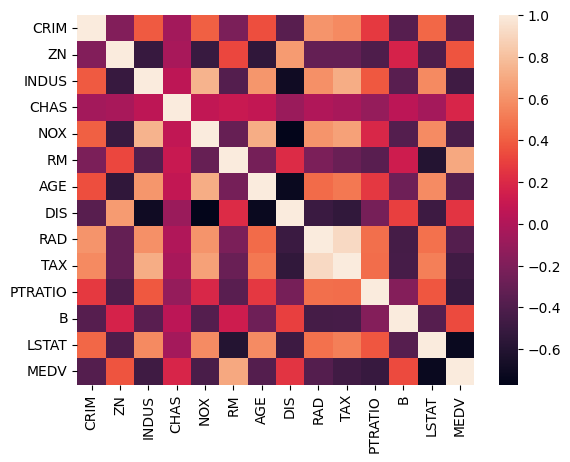

In [ ]:
corr =df.corr()
sns.heatmap(corr)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=10)

LINEAR MODEL



```
# This is formatted as code
```



In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
predicted_house_price = linear_model.predict(x_test)
print("Predicted House Prices")
print(predicted_house_price)

Predicted House Prices
[28.4 31.1 23.5 26.6 19.6 14.3 50.  14.3 20.7 37.6 20.4 27.5 36.2 32.
 33.1 48.8 24.6 26.4 23.2 17.  41.3 14.9 18.5 25.  36.4 19.5 27.1 14.9
 46.  17.9 30.3 31.6 23.1 24.7 16.7 18.3  8.4 37.3 22.1 22.  46.7 30.1
 12.1 29.1 16.6 23.9 19.9 21.4 45.4 15.6 22.7 12.5 24.3 43.8 22.  33.8
 19.3 22.6 16.1 15.  19.6 21.2 50.  50.  29.4 17.8 22.8  8.8 32.5 42.8
 12.6 28.6 19.1 50.  27.5 23.7 50.   7.2 18.7 37.  22.9 22.9 17.1 22.
 23.6 23.9 27.1 29.  22.2  7.  20.7 18.5 21.6 23.  16.  15.  23.9 24.4
 22.6 19.8 22.2 18.6 19.7 23.1 13.5 21.2 23.1 13.6 22.8 18.2 13.1 23.2
 22.8 25.1 18.9 10.9 19.3 17.4 15.6 20.6 50.  32.7 21.8 13.4 16.6 23.6
 11.  23.8 23.1 33.2 28.2  8.5 32.4 29.6 17.1 24.2 26.4 33.2 10.5  8.8
 28.  10.5 15.4 15.3 10.4 15.7 43.1 24.7 21.  19.4 10.9 21.7]


In [ ]:
predicted_dataframe = pd.DataFrame(
    {"Predicted_Prices": predicted_house_price, "Actual_Prices": y_test})
print("Predicted and Actual Price Data frame")
print(predicted_dataframe)

Predicted and Actual Price Data frame
     Predicted_Prices  Actual_Prices
305              28.4           28.4
193              31.1           31.1
65               23.5           23.5
349              26.6           26.6
151              19.6           19.6
..                ...            ...
56               24.7           24.7
37               21.0           21.0
66               19.4           19.4
427              10.9           10.9
12               21.7           21.7

[152 rows x 2 columns]


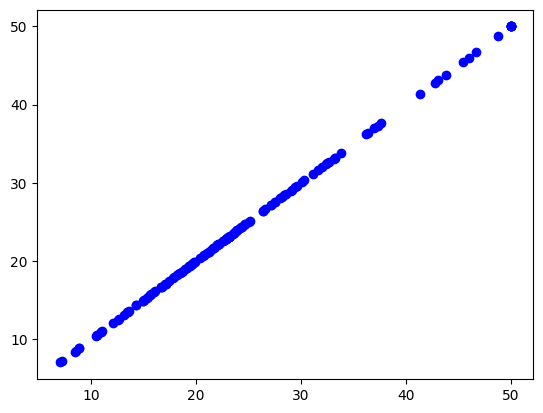

In [ ]:
plt.scatter(y_test, predicted_house_price, color='blue')
plt.show()